In [165]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [166]:
raw_data=pd.read_csv(r'C:\Users\rohan\vscode\ML\Car_price\1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


In [167]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


In [168]:
data=raw_data.drop(['Model'],axis=1)
#to remove the model since it have 312 uniqur entity axis 1 means column

In [169]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


In [170]:
data.isnull().sum()
#to chech missing values sum method gives sum of missing values

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [171]:
data_no_mv=data.dropna(axis=0)
data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.00,4025.00,4025.00,4025.00
mean,19552.31,163.57,2.76,2006.38
std,25815.73,103.39,4.94,6.70
min,600.00,0.00,0.60,1969.00
25%,6999.00,90.00,1.80,2003.00
50%,11500.00,158.00,2.20,2007.00
75%,21900.00,230.00,3.00,2012.00
max,300000.00,980.00,99.99,2016.00


C:\Users\rohan\AppData\Local\Temp\ipykernel_25536\216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

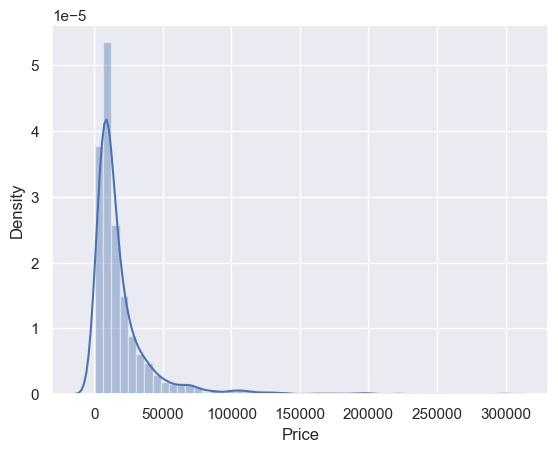

In [172]:
sns.distplot(data_no_mv['Price'])

In [173]:
#dealing with outliers
q= data_no_mv['Price'].quantile(0.99)  #gives 99 percentile element
data_1=data_no_mv[data_no_mv['Price']<q] #data1 is set to values having price less than 99 percentile
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


C:\Users\rohan\AppData\Local\Temp\ipykernel_25536\2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

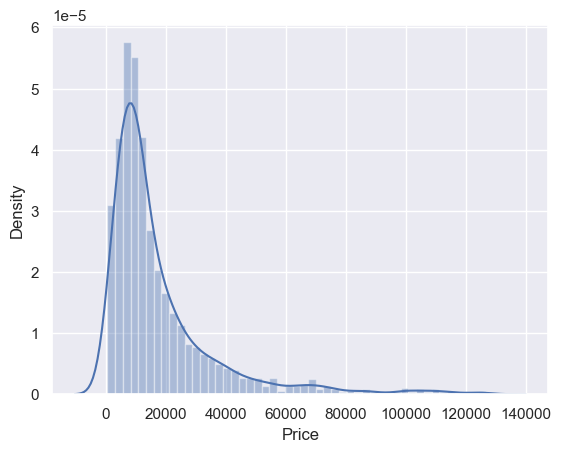

In [174]:
sns.distplot(data_1['Price'])

C:\Users\rohan\AppData\Local\Temp\ipykernel_25536\807150956.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

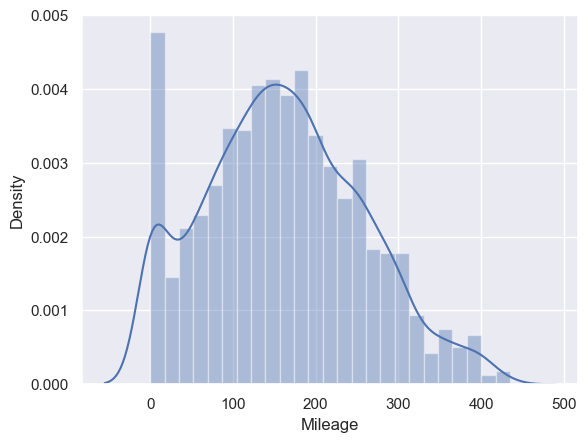

In [175]:
q=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]

sns.distplot(data_2['Mileage'])

In [176]:
data_3=data_2[data_2['EngineV']<6.5]

C:\Users\rohan\AppData\Local\Temp\ipykernel_25536\2525852583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Year'])


<Axes: xlabel='Year', ylabel='Density'>

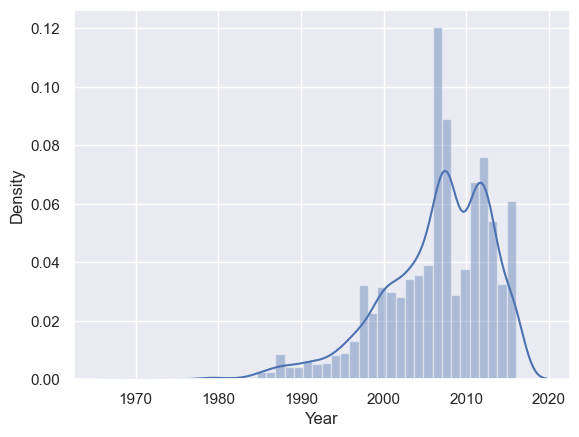

In [177]:
sns.distplot(data_3['Year'])

C:\Users\rohan\AppData\Local\Temp\ipykernel_25536\3766234564.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

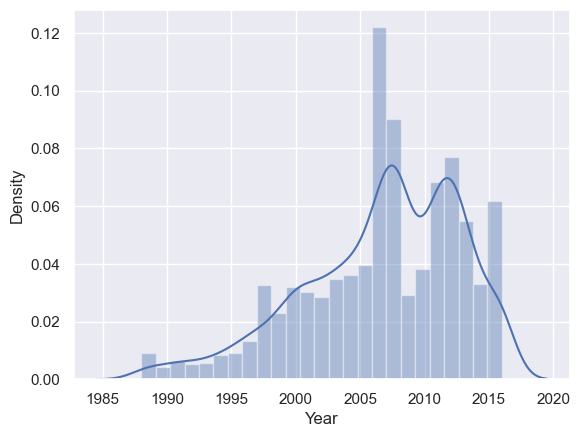

In [178]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [179]:
data_cleaned=data_4.reset_index(drop=True)
data_4.describe(include='all')
#reset_index() creates a new sequential index (0, 1, 2, …)


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


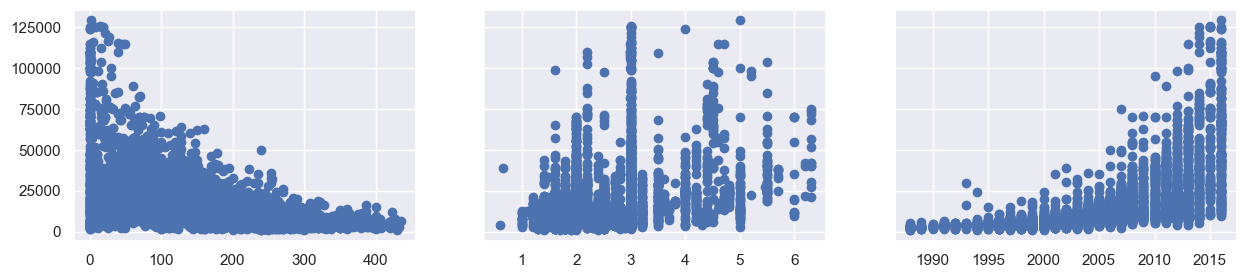

In [180]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))

ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax3.scatter(data_cleaned['Year'],data_cleaned['Price'])



In [181]:
#since no linear correlation so try with log 
data_cleaned['log_Price']=np.log(data_cleaned['Price'])

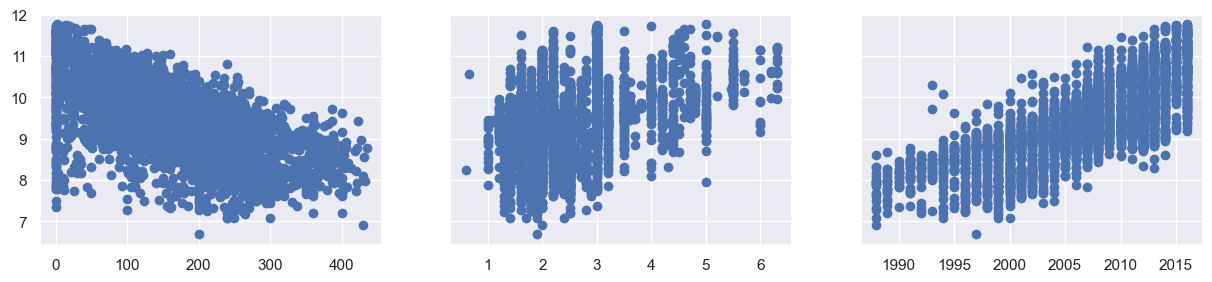

In [182]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))

ax1.scatter(data_cleaned['Mileage'],data_cleaned['log_Price'])
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_Price'])
ax3.scatter(data_cleaned['Year'],data_cleaned['log_Price'])

In [183]:
#now we have linear relation
data_cleaned=data_cleaned.drop(['Price'],axis=1)

In [184]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_Price'], dtype=object)

In [185]:
#to check the multicollinearity no library in the scikit learn so use statsmodel

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
print(vif)


    VIF features
0  3.79  Mileage
1 10.35     Year
2  7.66  EngineV


In [186]:
#Since multicolinearity of year is more so youshould remove it 
#also multicollinearity is more if vif value is more than 5

In [187]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

In [188]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True,dtype=int)

In [189]:
data_with_dummies.head()

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [190]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [191]:
cols=(['log_Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'])
      #in order to rearrange the order of the columns
      

In [192]:
data_preprocessed=data_with_dummies[cols]

In [193]:
targets=data_preprocessed['log_Price']
inputs=data_preprocessed.drop(['log_Price'],axis=1)

In [194]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [195]:
scaler.fit(inputs)

StandardScaler()

In [196]:
inputs_scaled=scaler.transform(inputs)

In [197]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=480)


In [198]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

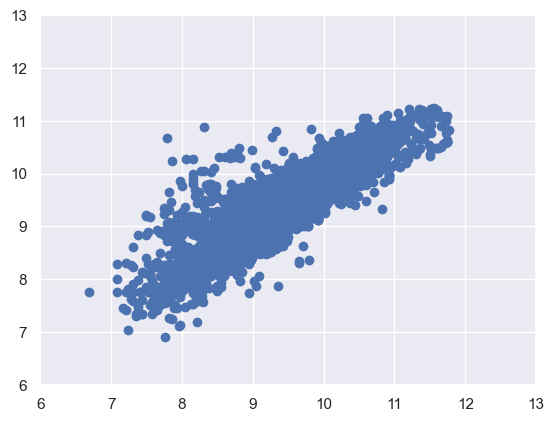

In [199]:
y_hat=reg.predict(x_train)
plt.scatter(y_train,y_hat)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show
#to check whether our model is giving correct if the plots cluster around 45 degree line then correct
#  


C:\Users\rohan\AppData\Local\Temp\ipykernel_25536\3039744237.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_hat)


Text(0.5, 1.0, 'Residual pdf')

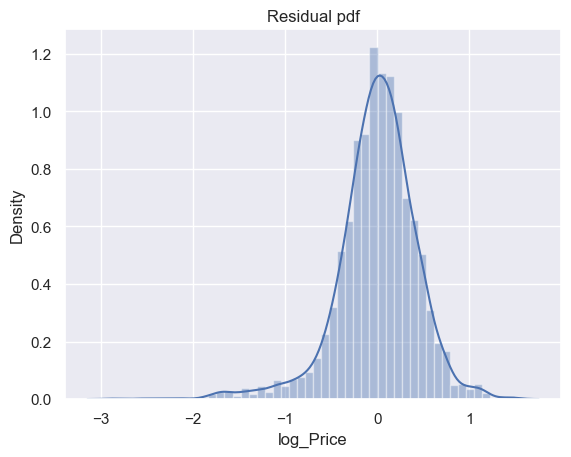

In [200]:
sns.distplot(y_train-y_hat)
plt.title("Residual pdf")
#check the correctness of our model

In [201]:
reg.score(x_train,y_train)

0.7554533264989691

In [202]:
reg.intercept_

np.float64(9.414490204119264)

In [203]:
reg.coef_

array([-4.57904248e-01,  2.06194911e-01,  9.82488489e-03,  1.78374826e-04,
       -1.41759444e-01, -1.94231000e-01, -6.37979119e-02, -9.55002742e-02,
       -1.45113602e-01, -1.01464897e-01, -1.97921035e-01, -1.28836275e-01,
       -1.57892602e-01, -1.21334473e-01, -2.84810811e-02, -1.49248303e-01,
        3.15076935e-01])

In [204]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['coefficients']=reg.coef_
reg_summary
#here audi is taken as reference and all the negative coeffs refers to cars value less than audi and pos coeffs refers to price greater than audi 

,Features,coefficients
0,Mileage,-0.46
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.00
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.19
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.10
8,Body_hatch,-0.15
9,Body_other,-0.10


In [205]:
data_cleaned['Brand'].unique()
#benchmark-Audi


array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [206]:
data_cleaned['Registration'].unique()
#benchmark-no

array(['yes', 'no'], dtype=object)

In [207]:
data_cleaned['Body'].unique()
#benchmark-crossover

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [208]:
data_cleaned['Engine Type'].unique()
#benchmark-Diesel

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

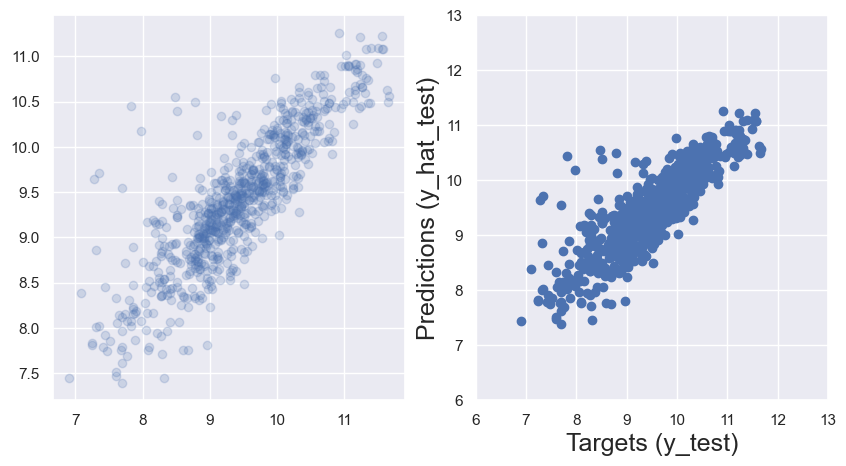

In [209]:
y_hat_test = reg.predict(x_test)
f,(pl1,pl2)=plt.subplots(1,2,figsize=(10,5))
pl1.scatter(y_test, y_hat_test, alpha=0.2)
pl2.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
#same here 45degree line is reference so the predition is correct


In [210]:
compdf=pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)


In [211]:
compdf['Target'] = np.exp(y_test)
compdf['diff']=compdf['Target']-compdf['Prediction']

In [212]:
compdf['Diff%']=np.abs(compdf['diff']/compdf['Target'])*100

In [213]:
compdf

,Prediction,Target,diff,Diff%
0,12486.39,12900.00,413.61,3.21
1,6781.64,6500.00,-281.64,4.33
2,9223.24,10499.00,1275.76,12.15
3,74521.20,74999.00,477.80,0.64
4,8759.14,11950.00,3190.86,26.70
...,...,...,...,...
769,9483.27,8300.00,-1183.27,14.26
770,15961.36,18100.00,2138.64,11.82
771,6630.37,3900.00,-2730.37,70.01
772,10371.06,11777.00,1405.94,11.94


In [214]:
compdf.describe()

,Prediction,Target,diff,Diff%
count,774.00,774.00,774.00,774.00
mean,15963.34,18079.09,2115.76,39.90
std,12407.60,18312.19,10065.55,87.85
min,1626.74,999.00,-33217.11,0.11
25%,7784.69,7211.25,-1839.29,10.97
50%,12093.62,11956.00,185.85,24.25
75%,20408.59,22375.00,3899.21,40.87
max,77734.05,116500.00,78959.07,1277.01


In [215]:
pd.options.display.max_rows = 500
pd.set_option('display.float_format', lambda x: '%0.2f' %x)
compdf.sort_values(by=['Diff%'])

,Prediction,Target,diff,Diff%
682,4304.88,4300.00,-4.88,0.11
616,9186.42,9200.00,13.58,0.15
24,10931.69,10900.00,-31.69,0.29
699,25582.68,25500.00,-82.68,0.32
19,22630.36,22711.65,81.29,0.36
...,...,...,...,...
541,38017.11,4800.00,-33217.11,692.02
69,26390.65,2900.00,-23490.65,810.02
398,16442.81,1550.00,-14892.81,960.83
117,15387.31,1450.00,-13937.31,961.19
